# Conversion Analysis: Store and SKU Performance

In this analysis, we will investigate the conversion performance across multiple stores and SKUs based on the provided transaction data. The goal is to identify key trends and patterns that can drive improvements in sales performance.

### Dataset Overview:
The dataset includes the following key attributes:
- **Store ID**: Identifies the store.
- **SKU ID**: Identifies the product.
- **Total Visits**: The total number of visits (users who visited the store).
- **Transactions**: The number of successful purchases made.
- **Revenue**: Total revenue generated from the transactions.

Our primary objective is to:
1. Calculate conversion rates at both the **store level** and **SKU level**.
2. Identify **top-performing** and **underperforming** stores and SKUs based on conversion rates.
3. Highlight **key trends** related to store or SKU performance.
4. Provide actionable recommendations to improve sales performance.

Let’s dive into the analysis!


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")


## Step 1: Data Loading and Initial Inspection

In this section, I loaded the dataset, checked its structure, and ensured data quality by:
- Viewing data types and nulls
- Inspecting descriptive stats
- Removing duplicates if any

This step ensured a clean foundation for further analysis.


In [117]:
df = pd.read_csv("C:/Users/91748/Downloads/dataset.csv")


In [118]:
df.head()

,Store ID,SKU ID,Total Visits,Transactions,Revenue
0,Store_1,SKU_1,606,573,74688.67
1,Store_1,SKU_2,695,27,1390.60
2,Store_1,SKU_3,389,285,50679.63
3,Store_1,SKU_4,689,505,16764.34
4,Store_1,SKU_5,522,230,41928.40


In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store ID      1000 non-null   object 
 1   SKU ID        1000 non-null   object 
 2   Total Visits  1000 non-null   int64  
 3   Transactions  1000 non-null   int64  
 4   Revenue       1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [120]:

df.dtypes


Store ID         object
SKU ID           object
Total Visits      int64
Transactions      int64
Revenue         float64
dtype: object

In [121]:
df.isnull().sum()


Store ID        0
SKU ID          0
Total Visits    0
Transactions    0
Revenue         0
dtype: int64

In [122]:
df.describe()


,Total Visits,Transactions,Revenue
count,1000.000000,1000.000000,1000.00000
mean,526.054000,264.865000,27883.25593
std,275.404057,222.826489,30143.18769
min,50.000000,0.000000,0.00000
25%,294.250000,80.000000,6115.60000
50%,530.000000,209.500000,16683.21000
75%,758.000000,396.250000,39546.38250
max,998.000000,974.000000,173972.54000


In [123]:
df.duplicated().sum()


0

### 🧠 Key Observations:
- The dataset contains transactional-level data with fields like **Store ID**, **SKU ID**, **Total Visits**, **Transactions**, and **Revenue**.
- No missing or duplicated entries — ideal for analysis.

## Step 2: Feature Engineering and Univarient Analysis

In this step, I created three important business KPIs:

- **Conversion Rate** = Transactions / Total Visits
- **Revenue per Visit** = Revenue / Total Visits
- **Revenue per Transaction** = Revenue / Transactions

These features allow deeper insight into how well each store and product is performing. These metrics will be used in visual analysis and recommendations.


In [124]:
df["Conversion Rate"] = df["Transactions"] / df["Total Visits"] * 100
df["Revenue per Visit"] = df["Revenue"] / df["Total Visits"]
df["Revenue per Transaction"] = df["Revenue"] / df["Transactions"]

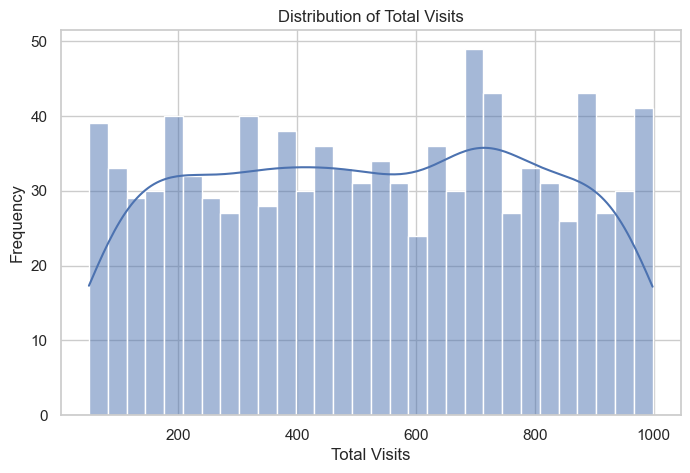

In [150]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total Visits'], bins=30, kde=True)
plt.title("Distribution of Total Visits")
plt.xlabel("Total Visits")
plt.ylabel("Frequency")
plt.show()


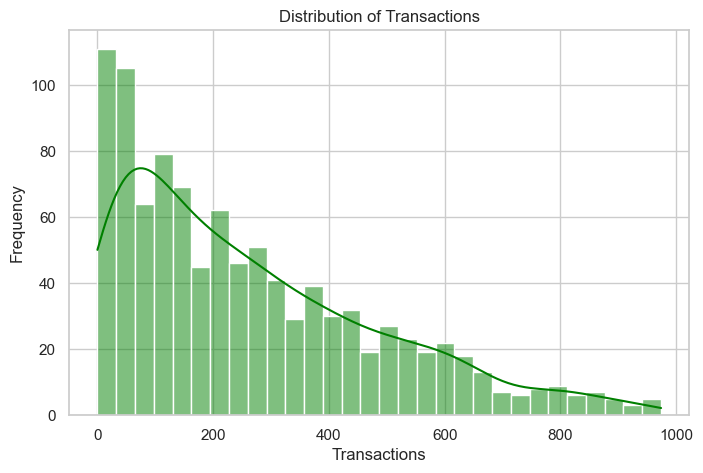

In [151]:
plt.figure(figsize=(8,5))
sns.histplot(df['Transactions'], bins=30, kde=True, color='green')
plt.title("Distribution of Transactions")
plt.xlabel("Transactions")
plt.ylabel("Frequency")
plt.show()


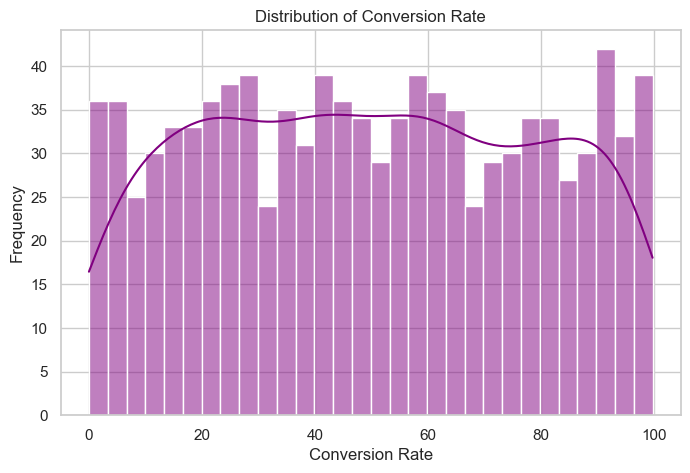

In [153]:
plt.figure(figsize=(8,5))
sns.histplot(df['Conversion Rate'], bins=30, kde=True, color='purple')
plt.title("Distribution of Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()


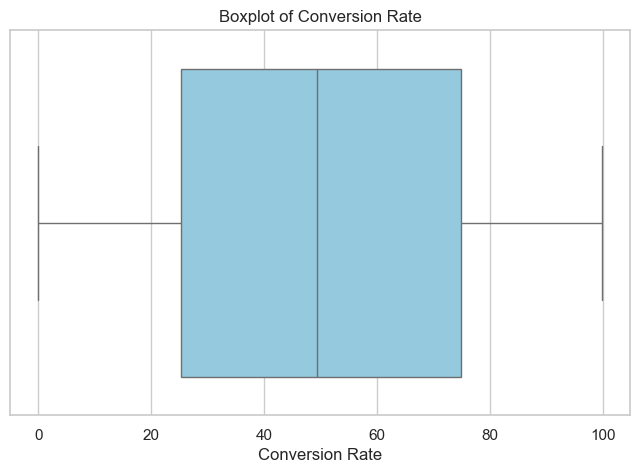

In [154]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Conversion Rate'], color='skyblue')
plt.title("Boxplot of Conversion Rate")
plt.show()


 **Transactions** are right-skewed, suggesting some SKUs/stores dominate traffic.


## 🔎 Step 3: Bivariate Analysis

In this step, we focused on comparing the performance of **Stores** and **SKUs** by their respective **conversion rates**. We aggregated the data at both the store level and SKU level and performed further analysis on top and bottom performers.

### ✅ Actions Performed:
- **Store-Level Analysis**:
    - We aggregated data by **Store ID**, calculating the total **Visits**, **Transactions**, and **Revenue** for each store.
    - **Conversion Rate** was computed for each store as `Transactions / Total Visits * 100`, and additional metrics like **Revenue per Visit** and **Revenue per Transaction** were also calculated.
    - Stores were then sorted by their **Conversion Rate** to identify the highest performing stores.

- **SKU-Level Analysis**:
    - Similarly, the data was aggregated at the **SKU ID** level, calculating **Total Visits**, **Transactions**, and **Revenue** for each SKU.
    - **Conversion Rate** and other performance metrics for SKUs were calculated and the SKUs were sorted by their **Conversion Rate**.

### 📊 Visualizations:
- **Store Conversion Rate Comparison**: A bar plot was created to compare the **Conversion Rates** across stores. The store IDs were plotted on the y-axis, and the corresponding conversion rates were shown on the x-axis.
  
- **SKU Conversion Rate Comparison**: A similar bar plot was created for **SKUs**, comparing their **Conversion Rates** across the SKU IDs.

### 🔝 Top and Bottom Performers:
- **Top Performing Stores**: Identified stores in the top 10% for **Conversion Rate**.
- **Underperforming Stores**: Identified stores in the bottom 10% for **Conversion Rate**.
- **Top Performing SKUs**: Identified SKUs in the top 20% for **Conversion Rate**.
- **Underperforming SKUs**: Identified SKUs in the bottom 20% for
their conversion efficiency.



In [125]:
# Group by 'Store ID' and calculate average conversion rate for each store
store_performance = df.groupby("Store ID").agg({
    "Total Visits": "sum",
    "Transactions": "sum",
    "Revenue": "sum"
}).reset_index()


In [126]:
store_performance["Conversion Rate"] = store_performance["Transactions"] / store_performance["Total Visits"] * 100
store_performance["Revenue per Visit"] = store_performance["Revenue"] / store_performance["Total Visits"]
store_performance["Revenue per Transaction"] = store_performance["Revenue"] / store_performance["Transactions"]

In [214]:
# Sort stores by average conversion rate (highest first)
store_performance = store_performance.sort_values(by='Conversion Rate', ascending=False)

store_performance.head(10)


,Store ID,Total Visits,Transactions,Revenue,Conversion Rate,Revenue per Visit,Revenue per Transaction
32,Store_39,9213,6124,667804.09,66.471291,72.484977,109.047043
43,Store_49,11032,7129,793523.76,64.621102,71.929275,111.309266
38,Store_44,8482,5356,467371.06,63.145485,55.101516,87.261214
30,Store_37,9458,5937,404139.26,62.772256,42.729886,68.071292
41,Store_47,9753,6081,521435.76,62.350046,53.464140,85.748357
48,Store_8,8794,5443,547882.53,61.894474,62.301857,100.658190
31,Store_38,8975,5518,509927.46,61.481894,56.816430,92.411646
44,Store_5,11997,7275,713837.60,60.640160,59.501342,98.122007
37,Store_43,12664,7616,786369.76,60.138977,62.094896,103.252332
20,Store_28,12186,7238,1057732.38,59.396028,86.798981,146.136002


In [128]:
# Step 2: Aggregate data at SKU-level
sku_performance = df.groupby("SKU ID").agg({
    "Total Visits": "sum",
    "Transactions": "sum",
    "Revenue": "sum"
}).reset_index()

sku_performance["Conversion Rate"] = sku_performance["Transactions"] / sku_performance["Total Visits"] * 100
sku_performance["Revenue per Visit"] = sku_performance["Revenue"] / sku_performance["Total Visits"]
sku_performance["Revenue per Transaction"] = sku_performance["Revenue"] / sku_performance["Transactions"]

In [131]:
sku_performance = sku_performance.sort_values(by='Conversion Rate', ascending=False)
sku_performance.head()

,SKU ID,Total Visits,Transactions,Revenue,Conversion Rate,Revenue per Visit,Revenue per Transaction
2,SKU_11,27856,16323,1665863.73,58.597789,59.802690,102.056223
17,SKU_7,26103,14654,1674024.12,56.139141,64.131484,114.236667
7,SKU_16,23574,12906,1234789.51,54.746755,52.379295,95.675617
14,SKU_4,24782,13505,1370489.58,54.495198,55.301815,101.480161
19,SKU_9,26715,14324,1284551.61,53.617818,48.083534,89.678275


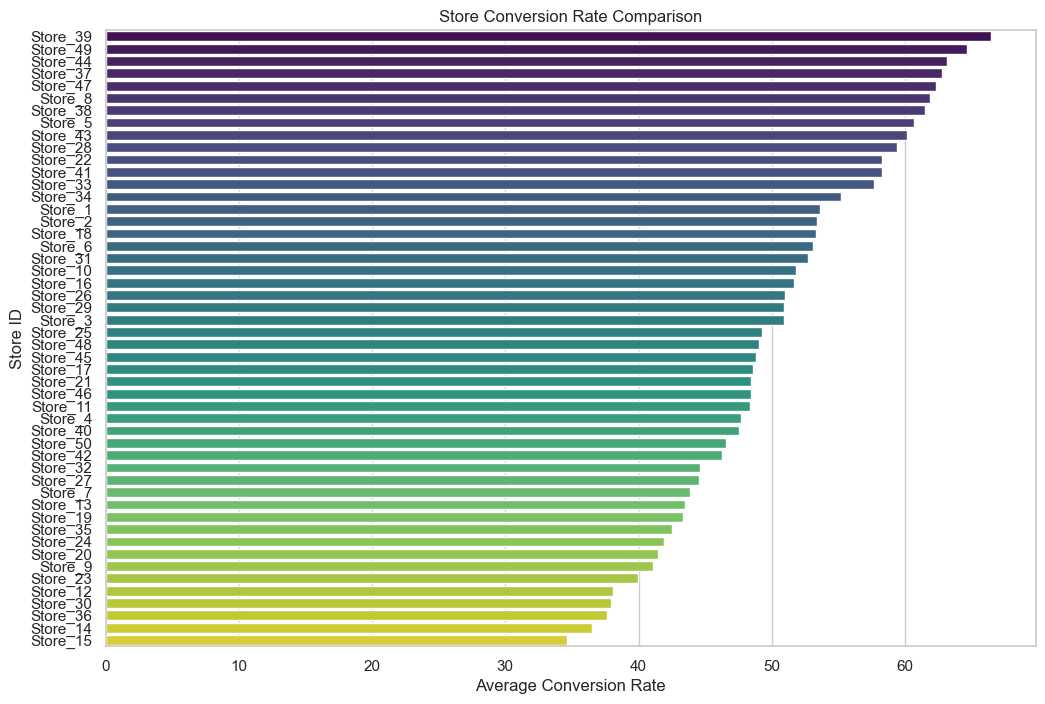

In [132]:
# Plotting conversion rates for stores
plt.figure(figsize=(12, 8))
sns.barplot(x='Conversion Rate', y='Store ID', data=store_performance, hue='Store ID', palette='viridis', legend=False)
plt.title('Store Conversion Rate Comparison')
plt.xlabel('Average Conversion Rate')
plt.ylabel('Store ID')
plt.show()


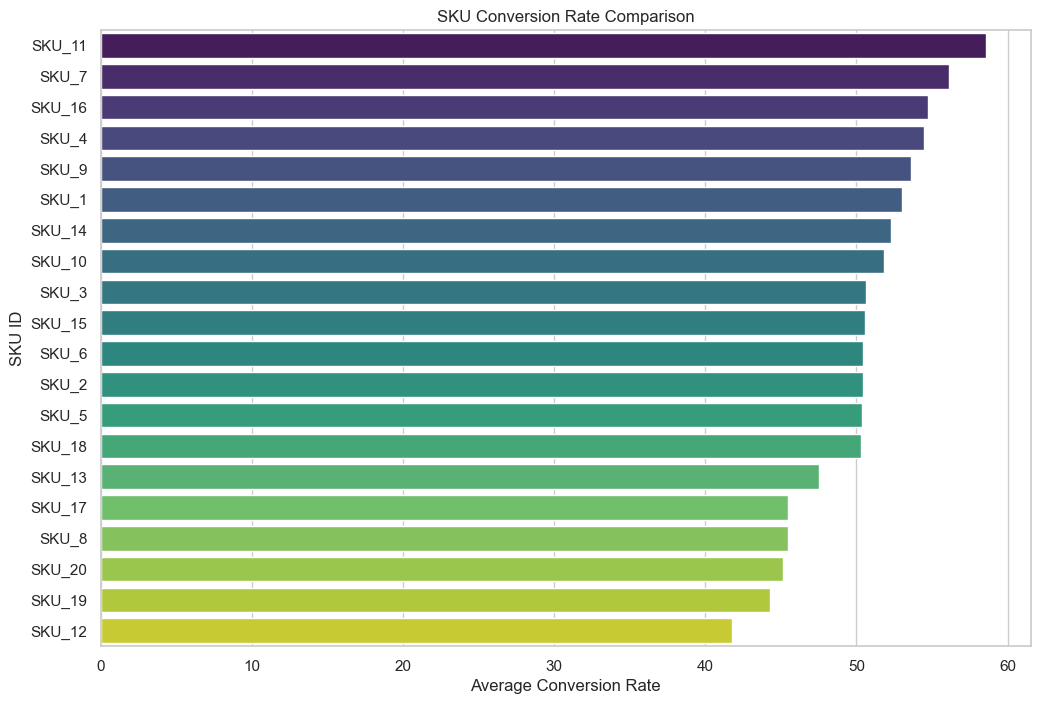

In [133]:
# Plotting conversion rates for SKUs
plt.figure(figsize=(12, 8))
sns.barplot(x='Conversion Rate', y='SKU ID', data=sku_performance, hue='SKU ID', palette='viridis', legend=False)
plt.title('SKU Conversion Rate Comparison')
plt.xlabel('Average Conversion Rate')
plt.ylabel('SKU ID')
plt.show()


In [145]:
# Top 10% performing stores
top_performing_stores = store_performance[store_performance['Conversion Rate'] > store_performance['Conversion Rate'].quantile(0.9)]

# Bottom 10% performing stores
underperforming_stores = store_performance[store_performance['Conversion Rate'] < store_performance['Conversion Rate'].quantile(0.1)]

# Top 20% performing SKUs
top_performing_skus = sku_performance[sku_performance['Conversion Rate'] > sku_performance['Conversion Rate'].quantile(0.8)]

# Bottom 20% performing SKUs
underperforming_skus = sku_performance[sku_performance['Conversion Rate'] < sku_performance['Conversion Rate'].quantile(0.2)]




In [146]:
# Displaying top and underperforming stores/SKUs
top_performing_stores.head()


,Store ID,Total Visits,Transactions,Revenue,Conversion Rate,Revenue per Visit,Revenue per Transaction
32,Store_39,9213,6124,667804.09,66.471291,72.484977,109.047043
43,Store_49,11032,7129,793523.76,64.621102,71.929275,111.309266
38,Store_44,8482,5356,467371.06,63.145485,55.101516,87.261214
30,Store_37,9458,5937,404139.26,62.772256,42.729886,68.071292
41,Store_47,9753,6081,521435.76,62.350046,53.464140,85.748357


In [147]:
underperforming_stores=underperforming_stores.sort_values(by='Conversion Rate', ascending=True)
underperforming_stores.head()


,Store ID,Total Visits,Transactions,Revenue,Conversion Rate,Revenue per Visit,Revenue per Transaction
6,Store_15,8922,3090,362021.48,34.633490,40.576270,117.159055
5,Store_14,12804,4674,421539.55,36.504217,32.922489,90.188179
29,Store_36,10149,3819,431669.84,37.629323,42.533239,113.032165
23,Store_30,10659,4043,388411.83,37.930387,36.439800,96.070203
3,Store_12,8698,3310,313714.85,38.054725,36.067470,94.777900


In [148]:

top_performing_skus.head()


,SKU ID,Total Visits,Transactions,Revenue,Conversion Rate,Revenue per Visit,Revenue per Transaction
2,SKU_11,27856,16323,1665863.73,58.597789,59.802690,102.056223
17,SKU_7,26103,14654,1674024.12,56.139141,64.131484,114.236667
7,SKU_16,23574,12906,1234789.51,54.746755,52.379295,95.675617
14,SKU_4,24782,13505,1370489.58,54.495198,55.301815,101.480161


In [149]:
underperforming_skus=underperforming_skus.sort_values(by='Conversion Rate', ascending=True)
underperforming_skus.head()

,SKU ID,Total Visits,Transactions,Revenue,Conversion Rate,Revenue per Visit,Revenue per Transaction
3,SKU_12,27687,11569,1222730.98,41.784953,44.162639,105.690291
10,SKU_19,25834,11440,1170544.47,44.282728,45.310230,102.320321
12,SKU_20,25224,11387,1165791.42,45.143514,46.217548,102.379153
18,SKU_8,25163,11447,1205717.50,45.491396,47.916286,105.330436


## 📝 Conversion & Revenue Analysis Summary

### 📊 Key Findings

---

### 🔝 Top Performing Stores

- **Store_39** leads with a **66.47% conversion rate** and high **revenue per visit** of **₹72.48**.
- **Store_49** and **Store_44** also show strong conversion (**>63%**) with excellent **revenue-to-transaction ratios**.

---

### 🔻 Underperforming Stores

- **Store_15** has the **lowest conversion rate** at **34.63%**, suggesting traffic isn’t translating into sales.
- **Store_14** and **Store_36** follow closely with **conversion rates below 38%**.

---

### 🚀 Top Performing SKUs

- **SKU_11**, **SKU_7**, and **SKU_4** show **conversions above 54%**, indicating high product appeal and optimized presentation.
- These SKUs also yield **over ₹100 per transaction**, reflecting strong pricing strategies.

---

### ⚠️ Underperforming SKUs

- **SKU_12** and **SKU_19** have **conversion rates below 45%**, despite drawing substantial traffic.
- This suggests **poor customer alignment** or issues with **UI/product display**.


## Step 4: Key Trends 

### 🔍 Correlation Analysis
We begin by examining the correlation between key metrics:

- **Total Visits**
- **Transactions**
- **Revenue**
- **Conversion Rate**

---

### 📊 Trend 1: Revenue vs Conversion Rate (SKU Level)
We explore the relationship between **Revenue** and **Conversion Rate** at the SKU level to understand how sales volume affects conversion rates.

---

### 📈 Trend 2: Store Traffic vs Conversion Rate
This trend looks at how **Store Traffic** influences **Conversion Rate**, helping us understand if more visitors lead to higher conversions.

---

### 📊 SKU & Store Performance Visualization

**Top and Bottom SKU Analysis:**
- We examine the **Top 10 SKUs** based on metrics like **Total Revenue**, **Revenue per Visit**, and **Total Visits**.
- We also analyze the **Bottom 10 SKUs** to identify underperforming products.

**Top and Bottom Store Analysis:**
- The **Top 10 Stores** are assessed based on **Total Revenue**, **Revenue per Visit**, and **Total Visits**.
- Similarly, the **Bottom 10 Stores** are reviewed to find areas for improvement.

---

### 🔄 SKU-Level Conversion Rate by Store
We analyze the **Conversion Rate** of each SKU across different stores to uncover how product performance varies between stores.

---

This section concludes the analysis of trends, highlighting areas for improvement and opportunities to optimize both store and SKU-level performance.


In [86]:
corr_matrix = df[['Total Visits', 'Transactions', 'Revenue', 'Conversion Rate']].corr()

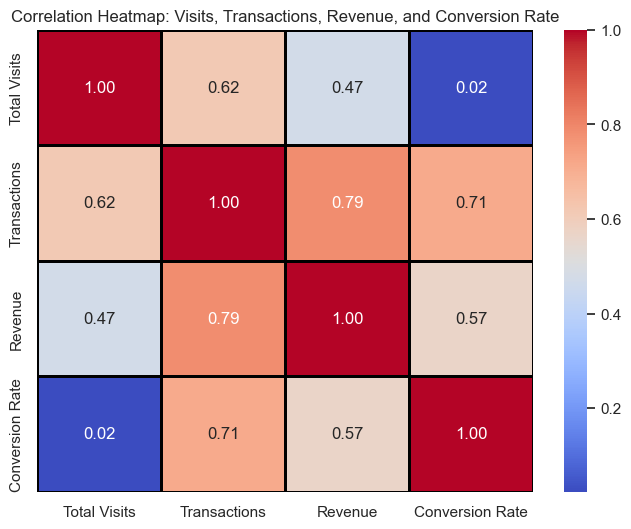

In [171]:
# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1, linecolor='black')
plt.title('Correlation Heatmap: Visits, Transactions, Revenue, and Conversion Rate')
plt.show()

## 🔍 Correlation Insights: Visits, Transactions, Revenue & Conversion Rate

This analysis reveals how key performance metrics relate to each other. The correlation values range from **-1 (strong negative)** to **+1 (strong positive)**.

---

### 📌 Key Takeaways

- **🛒 Transactions vs Revenue → 0.79**
  - Strongest correlation.
  - Suggests that **more transactions** are a **direct driver of revenue**.
  - Focus on increasing completed purchases to boost revenue.

- **🛒 Transactions vs Conversion Rate → 0.71**
  - High correlation.
  - Indicates that **stores or SKUs with higher conversion rates** tend to have **more transactions**.

- **💰 Revenue vs Conversion Rate → 0.57**
  - Moderate correlation.
  - Implies that improving **conversion efficiency** helps lift **revenue**, even without increasing traffic.

- **👣 Total Visits vs Transactions → 0.62**
  - Reasonable positive correlation.
  - More footfall does contribute to more transactions, but not always directly.

- **👣 Total Visits vs Revenue → 0.47**
  - Moderate correlation.
  - Shows that **higher store traffic alone does not guarantee higher revenue**.
  - Reinforces the importance of **conversion** and **average transaction value**.

- **👣 Total Visits vs Conversion Rate → 0.02**
  - Almost no correlation.
  - High traffic doesn’t necessarily mean better conversion.
  - Indicates **store experience, product relevance, or pricing** play a bigger role in conversion than just volume.

---

### 🎯 Strategic Implications

- Focus on **improving conversion rates** to increase both **transactions and revenue**.
- **Driving traffic alone is not enough** — optimize product placement, UX, and pricing to convert visits into sales.
- Use high-performing stores/SKUs as **benchmarks** to uplift underperformers.

---


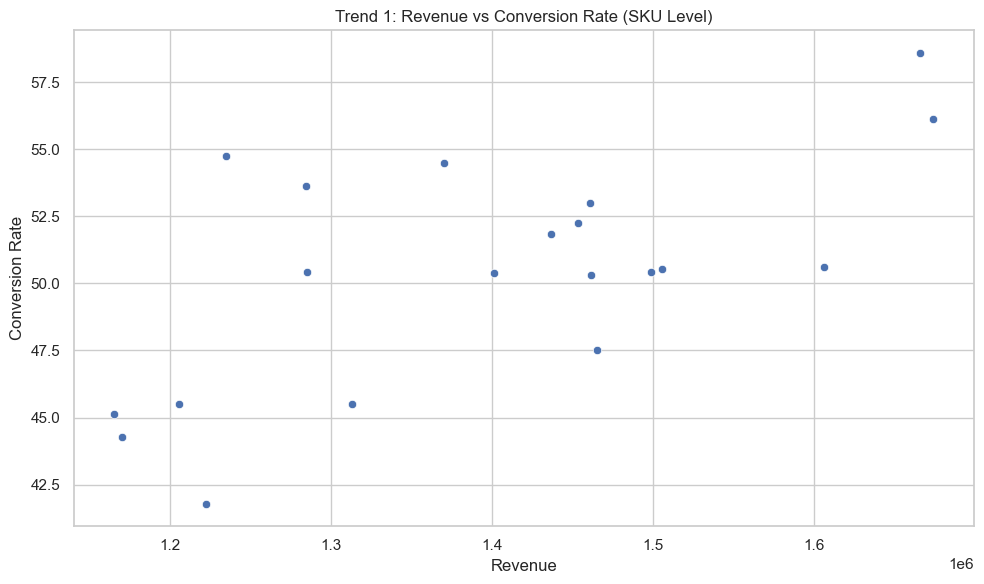

In [215]:

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=store_performance, x='Revenue', y='Conversion Rate')
# plt.title("Trend 1a: Revenue vs Conversion Rate (Store Level)")
# plt.xlabel("Revenue")
# plt.ylabel("Conversion Rate")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# Trend 1: High Revenue ≠ High Conversion (SKU Level)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sku_performance, x='Revenue', y='Conversion Rate')
plt.title("Trend 1: Revenue vs Conversion Rate (SKU Level)")
plt.xlabel("Revenue")
plt.ylabel("Conversion Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Trend 1: High Revenue ≠ High Conversion (always)

### 📊 From the scatter plot, we can clearly observe:

- Some SKUs generate **very high revenue** despite **low conversion rates**.  
   This could mean **high-priced items** are selling in **small quantities**, but still generating significant revenue.

- Conversely, some SKUs have **great conversion rates** but **low revenue**, likely due to **lower price points**.

---

### 🟢 Insight:
- Focus marketing on **high-conversion, low-revenue SKUs** by introducing **bundling** or **upselling** strategies.
- Optimize **pricing** or **promotion** of **high-revenue, low-conversion SKUs** to boost both **sales volume** and **efficiency**.

---

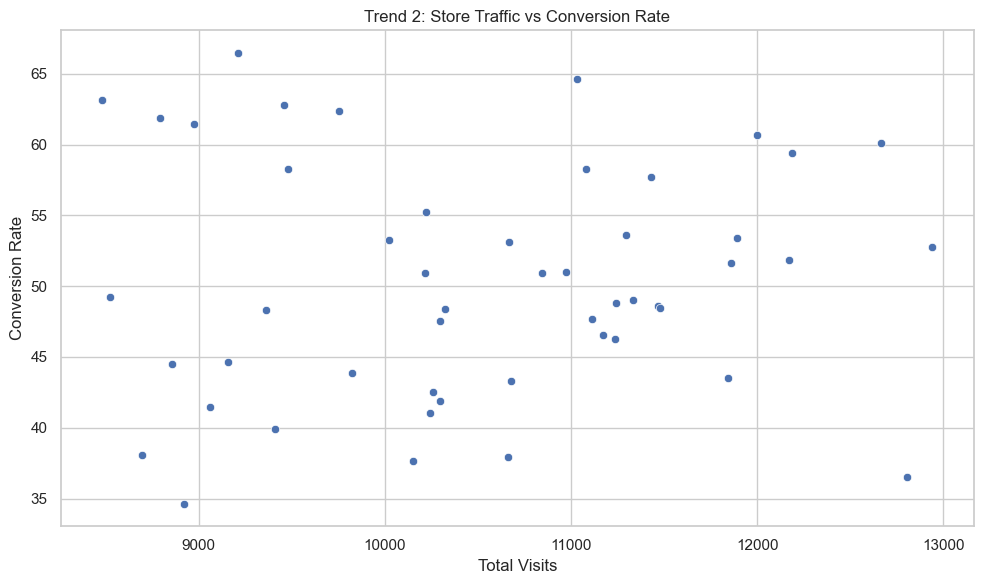

In [211]:
# Trend 2: Store Traffic vs Conversion Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_performance, x='Total Visits', y='Conversion Rate')
plt.title("Trend 2: Store Traffic vs Conversion Rate")
plt.xlabel("Total Visits")
plt.ylabel("Conversion Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=sku_performance, x='Total Visits', y='Conversion Rate')
# plt.title("Trend 2b: SKU Traffic vs Conversion Rate")
# plt.xlabel("Total Visits")
# plt.ylabel("Conversion Rate")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


## ✅ Trend 2: High Store Traffic Doesn’t Guarantee High Conversion

### 📈 From this plot:
- Several stores with **high visits** show **average or low conversion rates**.
- Meanwhile, some stores with **moderate visits** have **excellent conversion efficiency**.

---

### 🟢 Insight:
Stores with **high traffic but low conversion** are **underperforming**.  
These are ideal targets for **optimization**—such as:
- **UX improvements**
- **Targeted promotions**
- **SKU reallocation**

---



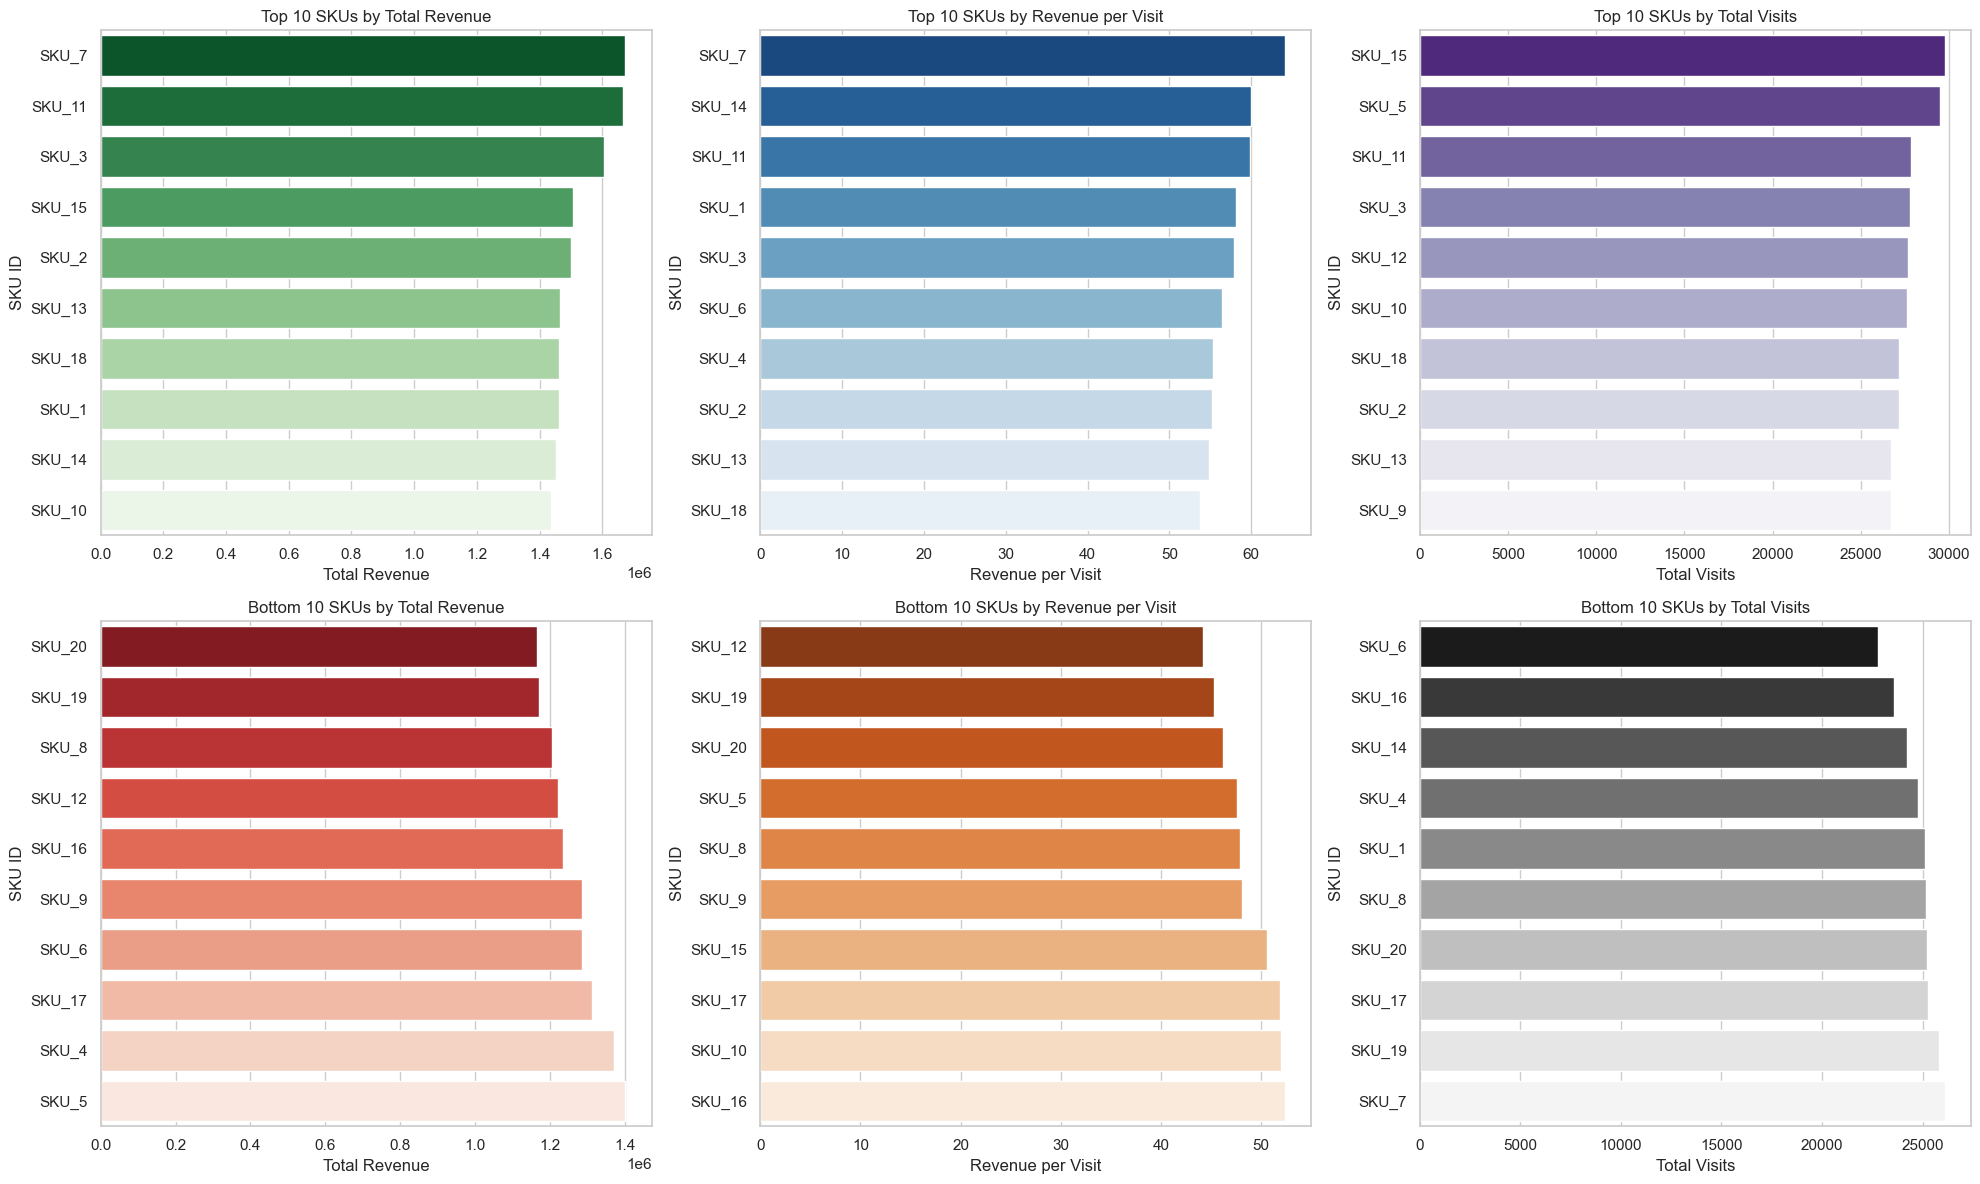

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and calculating stats
sku_stats = df.groupby('SKU ID').agg({
    'Revenue': 'sum',
    'Total Visits': 'sum'
})
sku_stats['Revenue per Visit'] = sku_stats['Revenue'] / sku_stats['Total Visits']

# Sort for Top 10 and Bottom 10
top_revenue = sku_stats.sort_values(by='Revenue', ascending=False).head(10)
top_revenue_visit = sku_stats.sort_values(by='Revenue per Visit', ascending=False).head(10)
top_visits = sku_stats.sort_values(by='Total Visits', ascending=False).head(10)

bottom_revenue = sku_stats.sort_values(by='Revenue', ascending=True).head(10)
bottom_revenue_visit = sku_stats.sort_values(by='Revenue per Visit', ascending=True).head(10)
bottom_visits = sku_stats.sort_values(by='Total Visits', ascending=True).head(10)

# Plotting
plt.figure(figsize=(20, 12))

# --- Top SKUs ---
# Total Revenue
plt.subplot(2, 3, 1)
sns.barplot(x=top_revenue['Revenue'], y=top_revenue.index, hue=top_revenue.index, palette='Greens_r', dodge=False)
plt.title("Top 10 SKUs by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("SKU ID")
plt.legend([],[], frameon=False)

# Revenue per Visit
plt.subplot(2, 3, 2)
sns.barplot(x=top_revenue_visit['Revenue per Visit'], y=top_revenue_visit.index, hue=top_revenue_visit.index, palette='Blues_r', dodge=False)
plt.title("Top 10 SKUs by Revenue per Visit")
plt.xlabel("Revenue per Visit")
plt.ylabel("SKU ID")
plt.legend([],[], frameon=False)

# Total Visits
plt.subplot(2, 3, 3)
sns.barplot(x=top_visits['Total Visits'], y=top_visits.index, hue=top_visits.index, palette='Purples_r', dodge=False)
plt.title("Top 10 SKUs by Total Visits")
plt.xlabel("Total Visits")
plt.ylabel("SKU ID")
plt.legend([],[], frameon=False)

# --- Bottom SKUs ---
# Total Revenue
plt.subplot(2, 3, 4)
sns.barplot(x=bottom_revenue['Revenue'], y=bottom_revenue.index, hue=bottom_revenue.index, palette='Reds_r', dodge=False)
plt.title("Bottom 10 SKUs by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("SKU ID")
plt.legend([],[], frameon=False)

# Revenue per Visit
plt.subplot(2, 3, 5)
sns.barplot(x=bottom_revenue_visit['Revenue per Visit'], y=bottom_revenue_visit.index, hue=bottom_revenue_visit.index, palette='Oranges_r', dodge=False)
plt.title("Bottom 10 SKUs by Revenue per Visit")
plt.xlabel("Revenue per Visit")
plt.ylabel("SKU ID")
plt.legend([],[], frameon=False)

# Total Visits
plt.subplot(2, 3, 6)
sns.barplot(x=bottom_visits['Total Visits'], y=bottom_visits.index, hue=bottom_visits.index, palette='Greys_r', dodge=False)
plt.title("Bottom 10 SKUs by Total Visits")
plt.xlabel("Total Visits")
plt.ylabel("SKU ID")
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


## 📊 Key Insights: SKU Performance Analysis

This analysis evaluates SKU performance from three perspectives:

1. **Total Revenue Generated**  
2. **Revenue Efficiency (Revenue per Visit)**  
3. **Customer Engagement (Total Visits)**

---

### 🔝 Top Performers

#### 🔟 Top 10 SKUs by Total Revenue
- These SKUs are the **primary revenue drivers**, contributing the most to overall revenue.
- Likely **high-demand** or **high-value** products.

#### 🔟 Top 10 SKUs by Revenue per Visit
- These SKUs generate the **most revenue per customer visit**, indicating **strong conversion efficiency**.
- Even with **fewer visits**, they yield **higher revenue per interaction**.

✅ **SKU 7** and **SKU 11** appear in **both top lists**, highlighting them as **high-performing and highly efficient products**.  
👉 These are **ideal SKUs to promote** and **keep well-stocked**.

📈 **SKU 14** appears in the **top 10 revenue** list but ranks among the **bottom 3 in total visits** — a **highly efficient SKU** that's succeeding despite low traffic.  
📉 In contrast, **SKU 5** has the **second-highest number of visits** but ranks in the **bottom 10 for revenue**, indicating **poor monetization** of high traffic.

---

### 🔻 Bottom Performers

#### ⬇️ Bottom 10 SKUs by Total Revenue
- These SKUs contribute the **least to overall revenue**.
- May indicate **poor demand**, **ineffective placement**, or **product irrelevance**.

#### ⬇️ Bottom 10 SKUs by Revenue per Visit
- These are the **least efficient** at converting visits into revenue.
- Could reflect **pricing**, **quality**, **value perception**, or **positioning issues**.

⚠️ **SKU 20** and **SKU 19** appear in **both bottom lists**, marking them as **low-priority or underperforming SKUs**.  
🔍 Recommend evaluating these SKUs for **discontinuation**, **repackaging**, or **repositioning** strategies.

---

### 🎯 Strategic Takeaways

- 🚀 **SKU 7** and **SKU 11** are **top-tier performers** — focus **marketing**, **bundling**, and **stock optimization** around them.
- 🚧 **SKU 5** is attracting attention but **failing to convert** — analyze its **pricing, display, and conversion funnel**.
- 🌟 **SKU 14** is an **unsung hero** — explore ways to **boost visibility** and **scale performance** further.
- 🧹 **SKU 19** and **SKU 20** may be **draining resources** — re-evaluate their **viability** in the catalog.

---

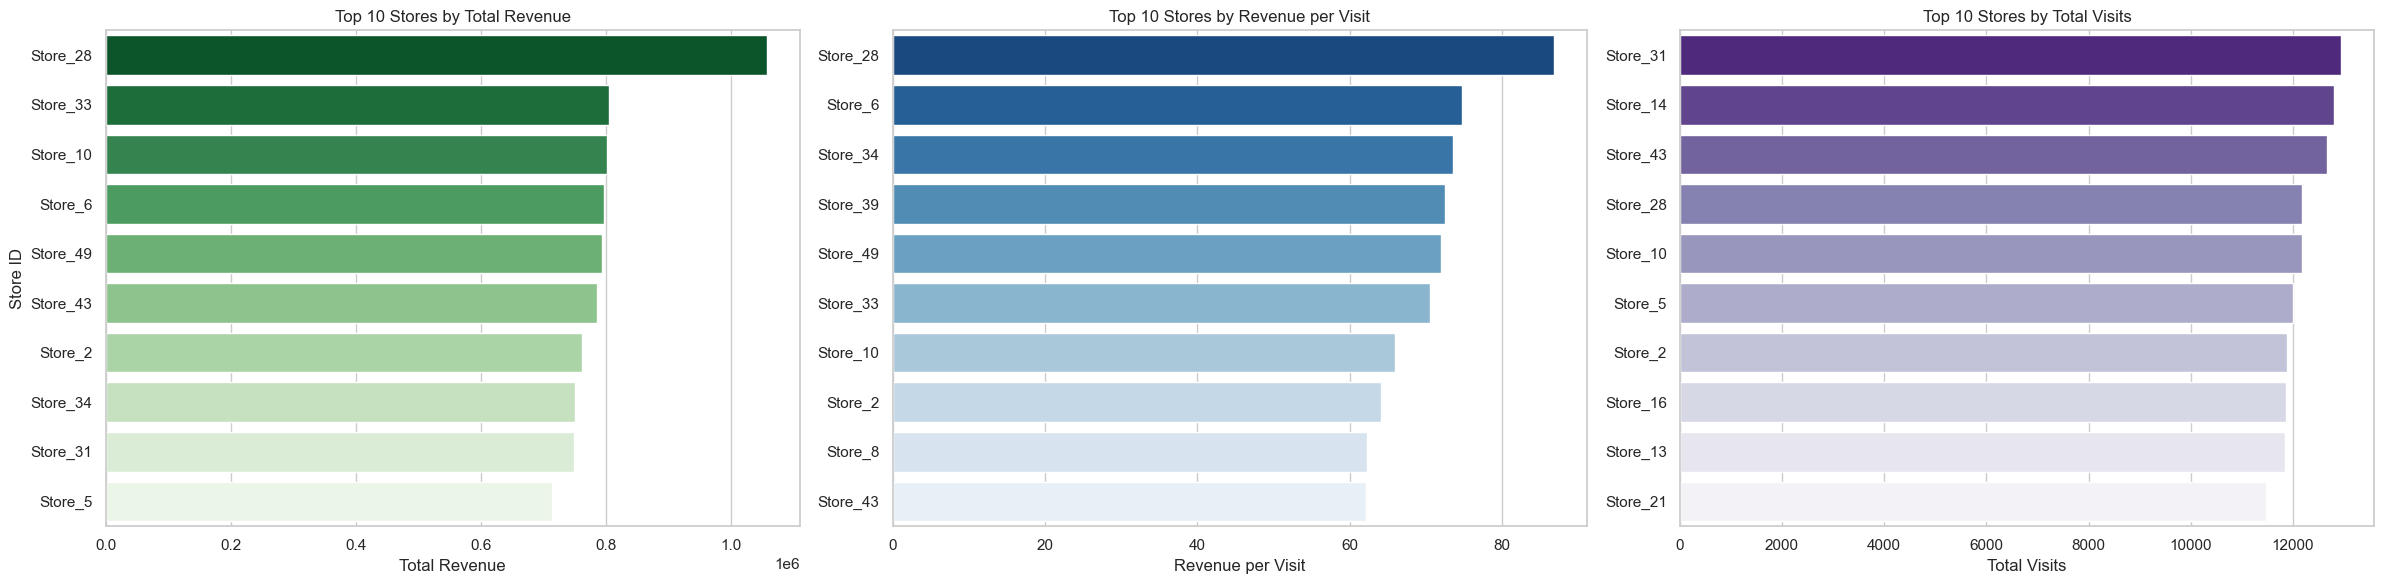

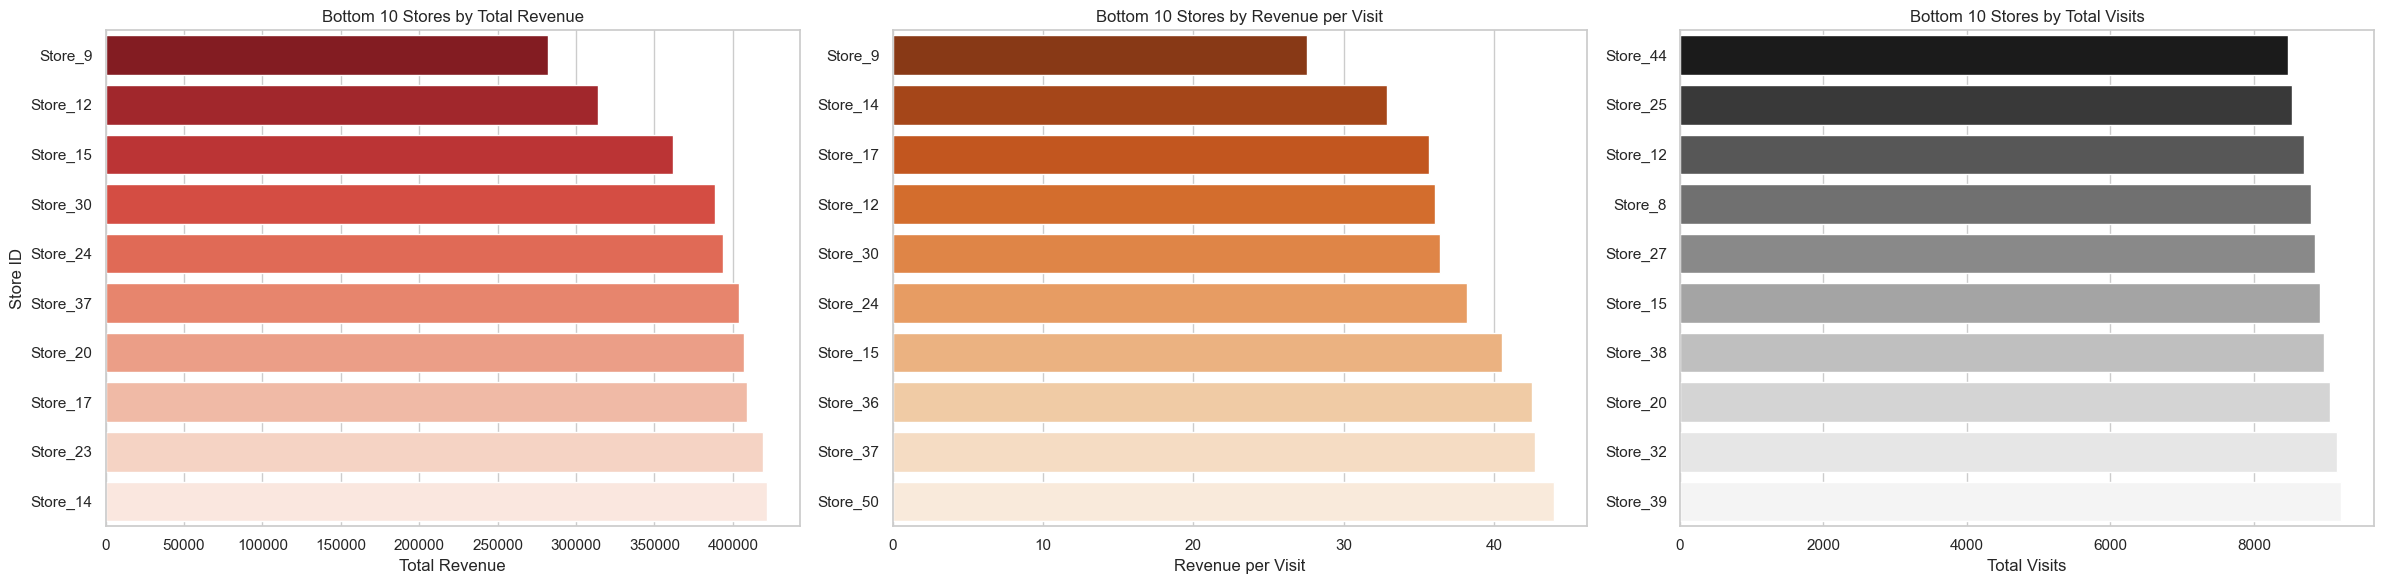

In [206]:
# Plotting Top 10
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=top_revenue['Revenue'], y=top_revenue.index, hue=top_revenue.index, palette='Greens_r', legend=False)
plt.title("Top 10 Stores by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Store ID")

plt.subplot(1, 3, 2)
sns.barplot(x=top_revenue_visit['Revenue per Visit'], y=top_revenue_visit.index, hue=top_revenue_visit.index, palette='Blues_r', legend=False)
plt.title("Top 10 Stores by Revenue per Visit")
plt.xlabel("Revenue per Visit")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x=top_visits['Total Visits'], y=top_visits.index, hue=top_visits.index, palette='Purples_r', legend=False)
plt.title("Top 10 Stores by Total Visits")
plt.xlabel("Total Visits")
plt.ylabel("")

plt.tight_layout()
plt.show()

# Plotting Bottom 10
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=bottom_revenue['Revenue'], y=bottom_revenue.index, hue=bottom_revenue.index, palette='Reds_r', legend=False)
plt.title("Bottom 10 Stores by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Store ID")

plt.subplot(1, 3, 2)
sns.barplot(x=bottom_revenue_visit['Revenue per Visit'], y=bottom_revenue_visit.index, hue=bottom_revenue_visit.index, palette='Oranges_r', legend=False)
plt.title("Bottom 10 Stores by Revenue per Visit")
plt.xlabel("Revenue per Visit")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x=bottom_visits['Total Visits'], y=bottom_visits.index, hue=bottom_visits.index, palette='Greys_r', legend=False)
plt.title("Bottom 10 Stores by Total Visits")
plt.xlabel("Total Visits")
plt.ylabel("")

plt.tight_layout()
plt.show()


## 📊 Key Insights: Store Performance by Revenue and Revenue per Visit

This analysis evaluates **Store** performance from three perspectives:
1. **Total revenue generated**
2. **Revenue efficiency (revenue per visit)**
3. **Total footfall (total visits)**

---

### 🔝 Top Performers

#### 🔟 Top 10 Stores by Total Revenue
- These stores are the **primary revenue drivers**, contributing significantly to total revenue.
- Likely located in **high-demand regions** or have **high average transaction values**.

#### 🔟 Top 10 Stores by Revenue per Visit
- These stores yield the **highest revenue per customer visit**, indicating **strong conversion efficiency** or **premium offerings**.

✅ **Store_28**, **Store_33**, and **Store_6** appear in **both top lists**, marking them as **standout stores**.  
👉 These stores should be **prioritized for marketing**, **inventory**, and **strategic expansion**.

---

### 🔻 Bottom Performers

#### ⬇️ Bottom 10 Stores by Total Revenue
- These stores contribute the **least to overall revenue**, possibly due to **low traffic** or **reduced sales volume**.

#### ⬇️ Bottom 10 Stores by Revenue per Visit
- These stores are **inefficient at converting visits into revenue**.
- May indicate **UX issues**, **local market mismatch**, or **product assortment problems**.

⚠️ **Store_9**, **Store_17**, and **Store_12** appear in **both bottom lists**, making them **critical underperformers**.  
🔍 Recommend investigating these for:
- **Promotional support**
- **SKU rebalancing**
- **Operational or layout improvements**

---

### 📉 Footfall vs Revenue: Key Observation

> 🚫 **More visits don't always mean more revenue.**

- **Store_14** has the **second-highest footfall**, yet it ranks among the **bottom 10 in total revenue** — indicating **low sales conversion or low-value transactions**.
- On the other hand, **Store_39** has **very low footfall**, yet it **performs strongly in revenue**, pointing to **high-ticket sales or effective conversion strategies**.

---

### 🎯 Strategic Takeaway

- **Store_28**, **33**, and **49** are **top-tier performers** — consider using them as **benchmarks** or **scaling their success patterns**.
- **Store_9**, **17**, and **12** need **urgent review** — assess for potential optimization or strategic repositioning.
- **Review outliers like Store_14 and Store_39** to understand the **disconnect between visits and revenue** — optimize **store experience**, **pricing**, or **product mix** accordingly.


---

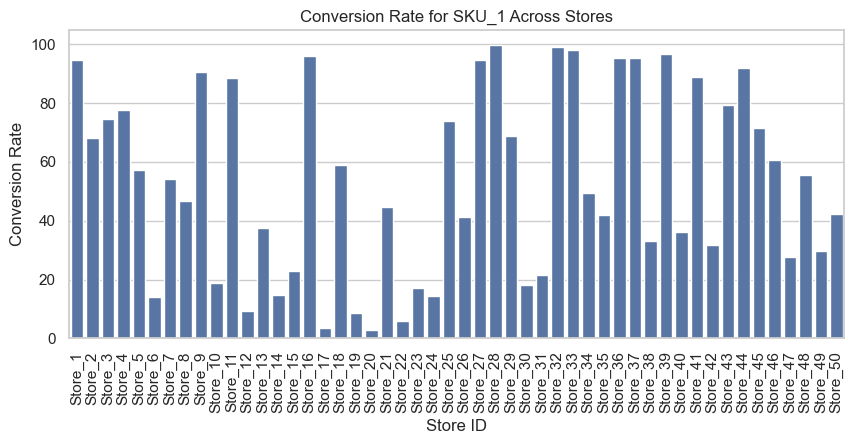

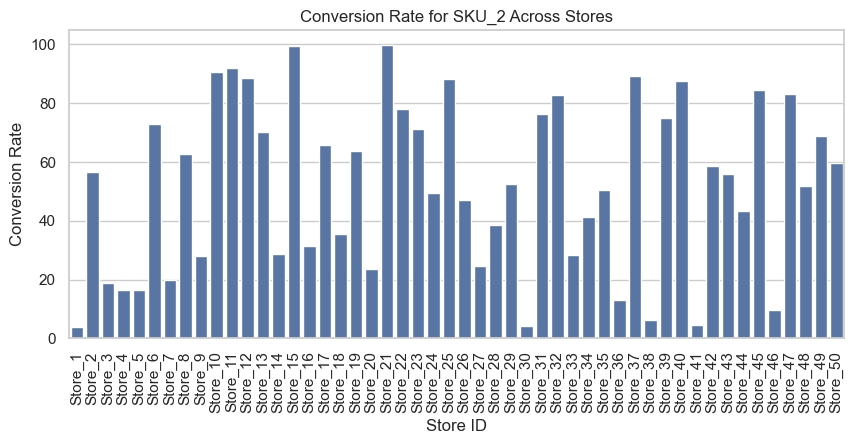

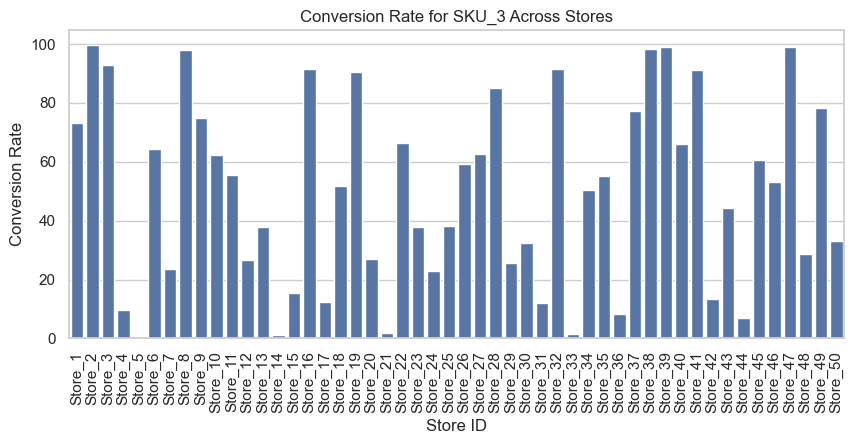

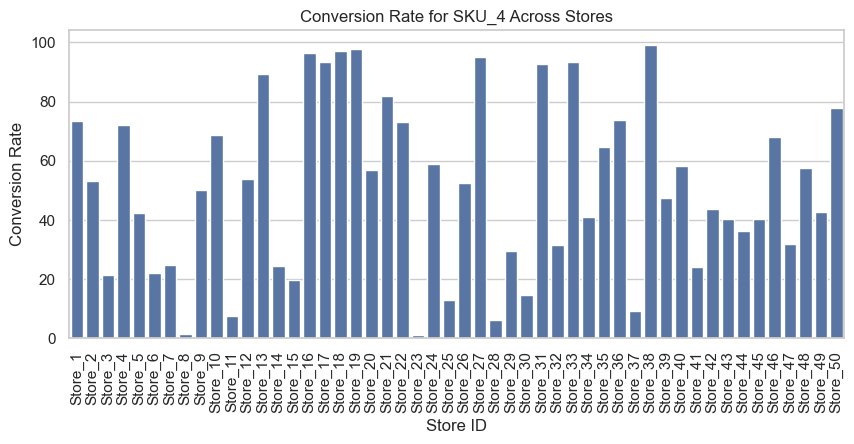

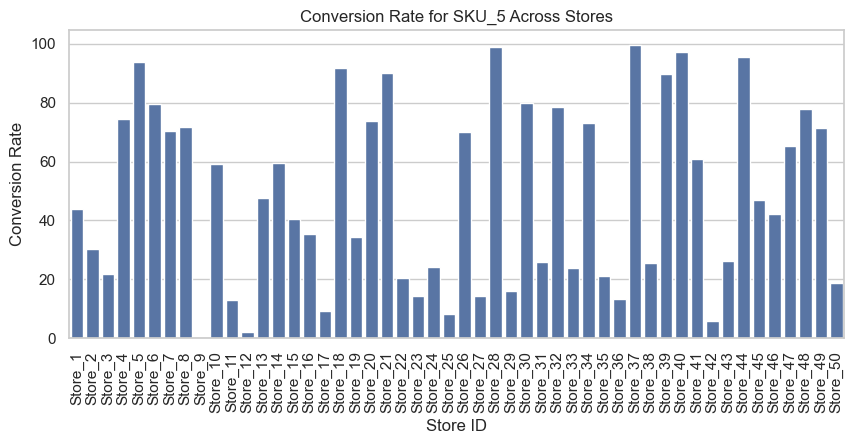

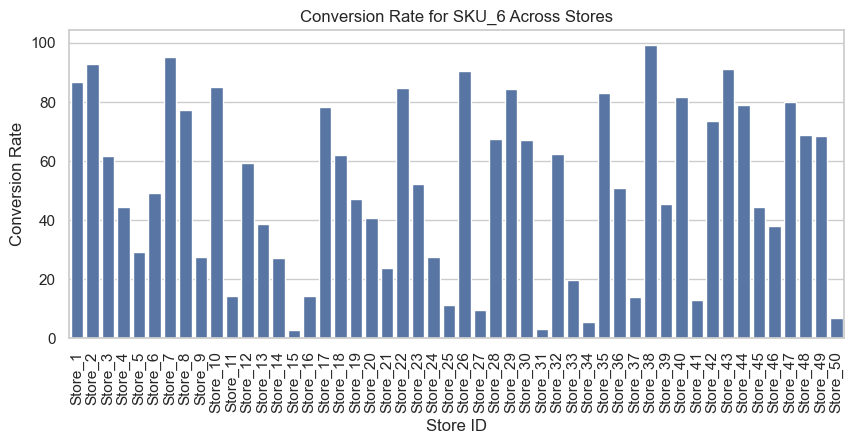

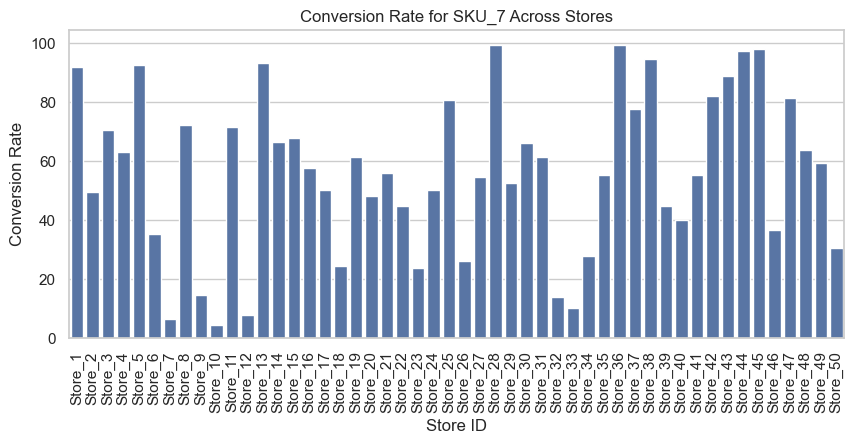

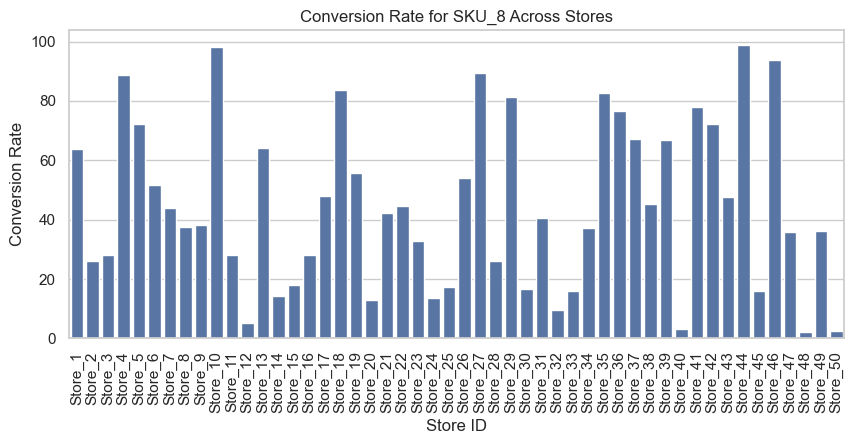

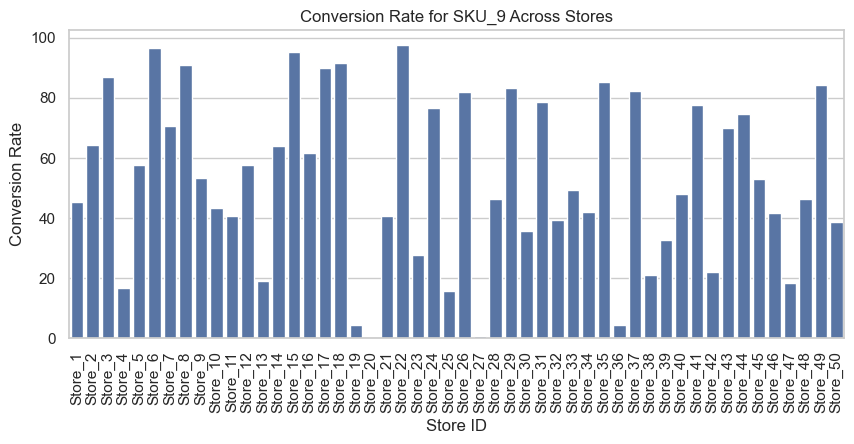

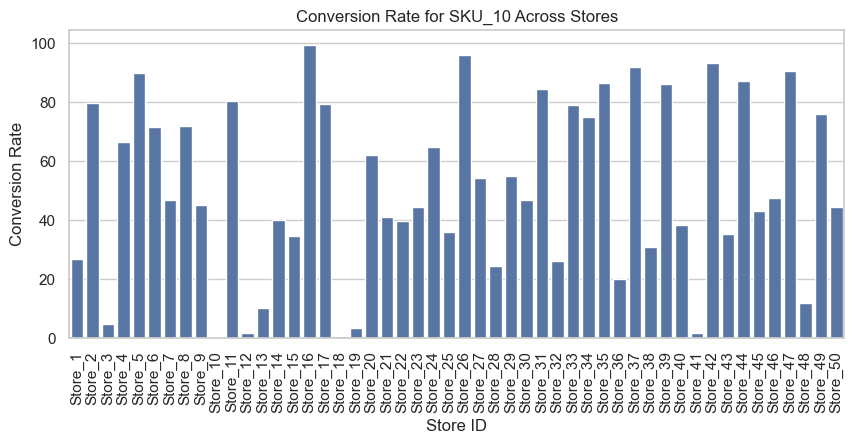

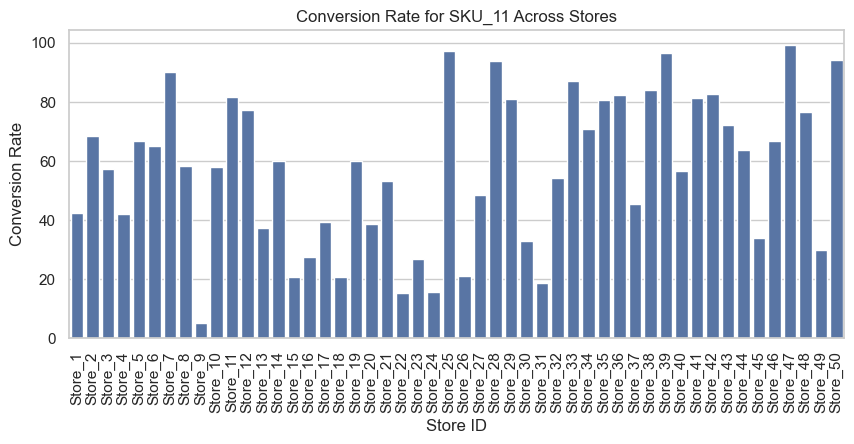

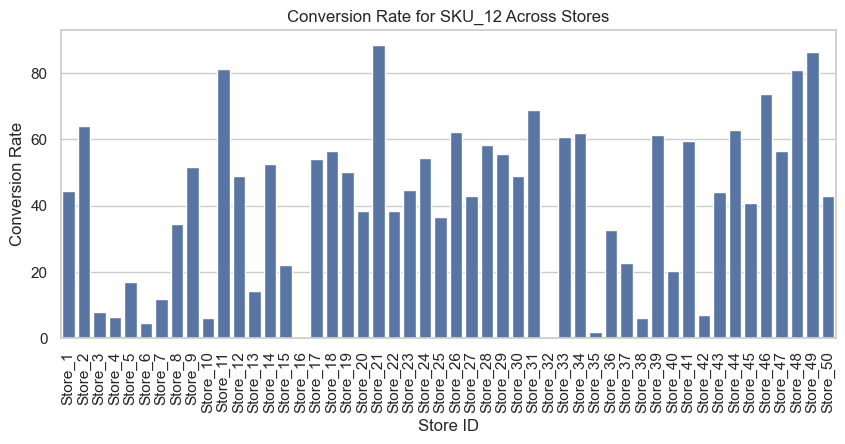

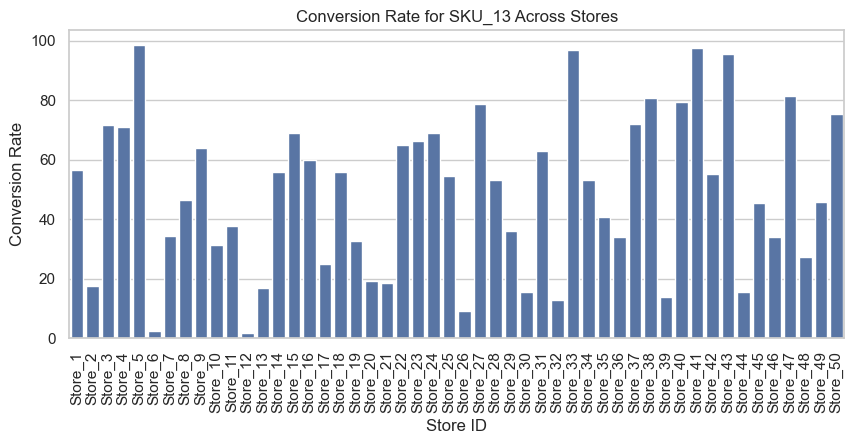

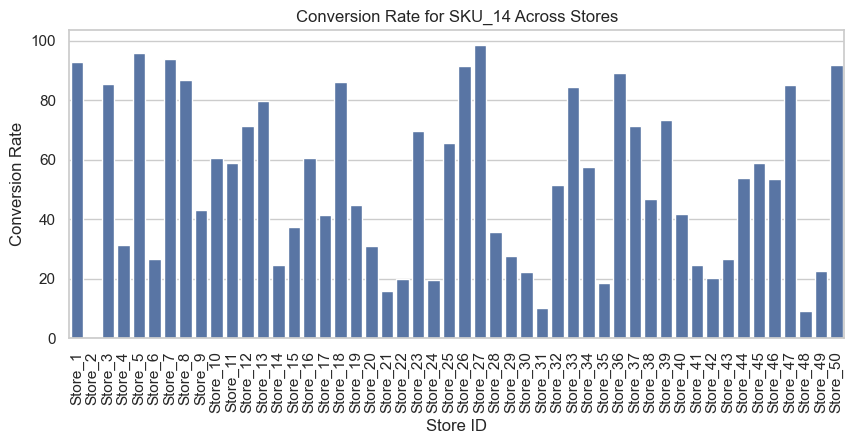

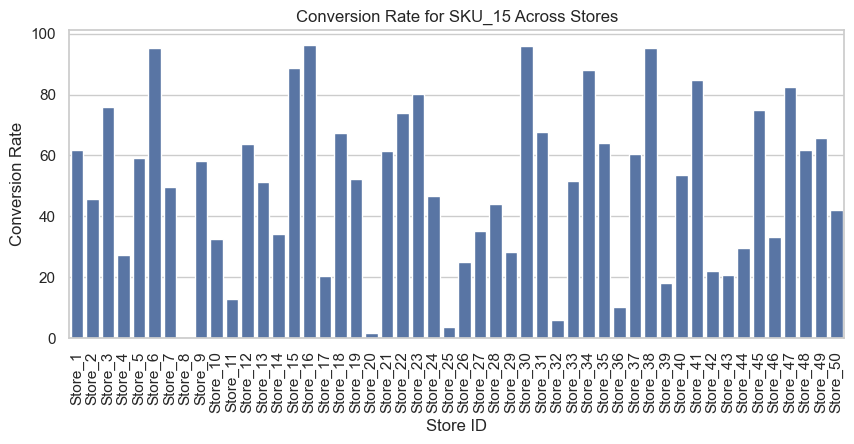

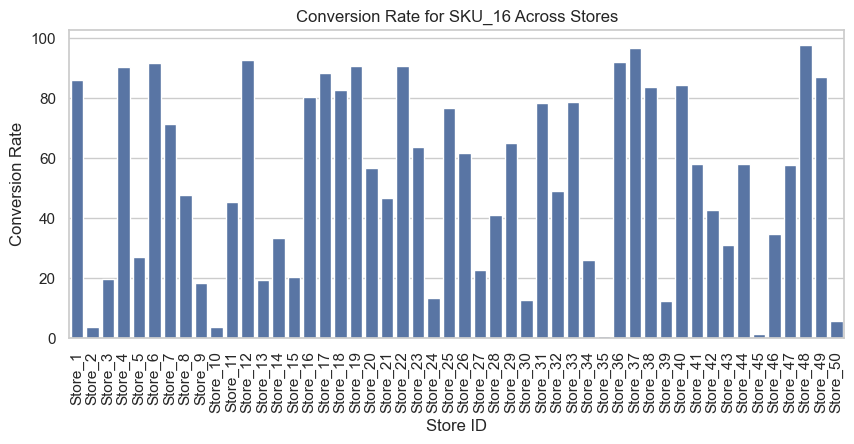

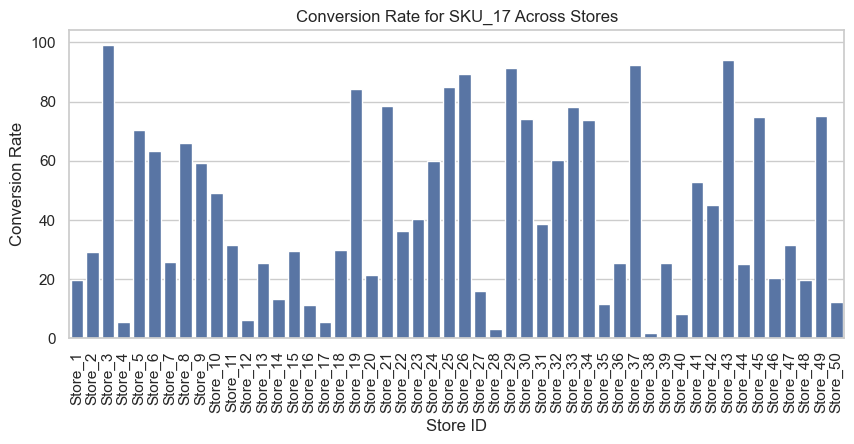

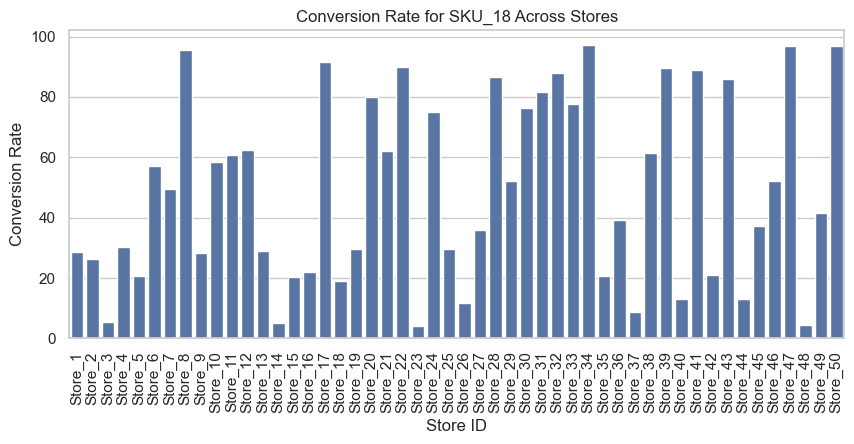

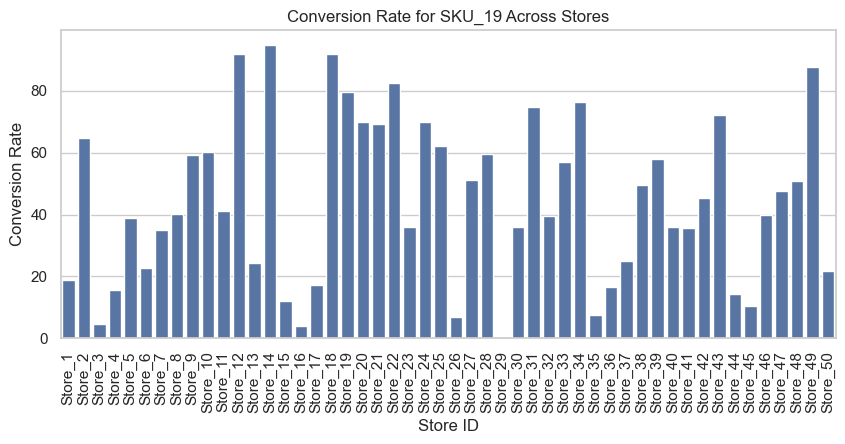

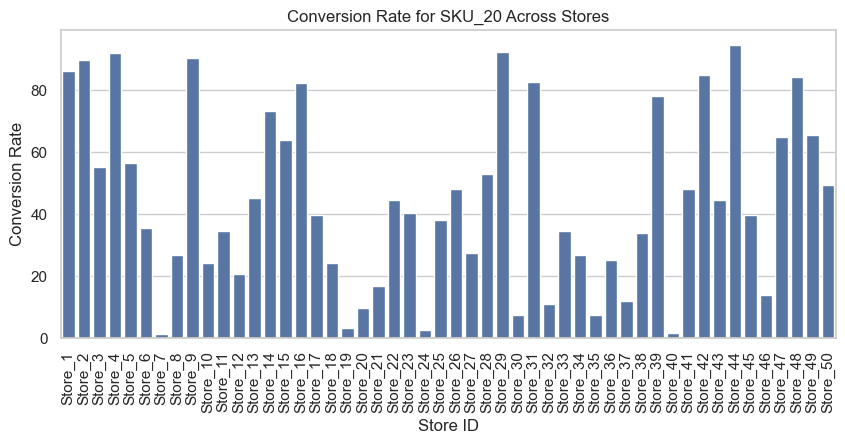

In [199]:
sample_skus = df['SKU ID'].unique()[:]  # First 10 SKUs for example

for sku in sample_skus:
    sku_data = df[df['SKU ID'] == sku]
    plt.figure(figsize=(10, 4))
    sns.barplot(x='Store ID', y='Conversion Rate', data=sku_data)
    plt.title(f'Conversion Rate for {sku} Across Stores')
    plt.xticks(rotation=90)
    plt.show()

## 🔍 SKU-wise Conversion Analysis Across Stores

This section explores **how each SKU converts across different stores**.  
For each SKU, we plot its **Conversion Rate** per store to identify:

- ✅ Which stores are performing best for that specific SKU.
- ⚠️ Where the SKU is underperforming despite presence.

### 📈 Key Points:

- Some SKUs may perform **exceptionally well in certain regions**, hinting at **store-level strengths** (e.g., local demand, staff expertise, display quality).
- Underperforming combinations could indicate **mismatch of product-market fit** at specific locations.
- For SKUs with **high variance across stores**, investigate **local factors** affecting conversion.
- Consider **store-specific marketing or layout changes** to improve performance of SKUs with low conversion in certain stores.


# 📄 Conversion & Revenue Analysis Summary

## 🔍 Key Findings

### 🏬 Store Performance

- **Store_39** is the top performer with a **66.47% conversion rate** and **₹72.48 revenue per visit**, indicating highly effective monetization despite low footfall.
- **Store_49** and **Store_44** also maintain strong conversion rates **(>63%)** with excellent revenue-to-transaction ratios.
- **Store_28**, **Store_33**, and **Store_6** appear in the **top 10 both for total revenue and revenue per visit**, making them high-priority stores for investment and replication.
- **Store_15** has the **lowest conversion rate (34.63%)**, while **Store_14** and **Store_36** also fall below 38%, signaling poor conversion of traffic into sales.
- **Store_14** has **high visits but low revenue**, suggesting inefficiencies in layout, UX, or product mix.
- **Store_39**, despite having low traffic, achieves high revenue and conversion — indicating that **visitor quality and pricing strategy matter more than volume alone**.

---

### 📦 SKU Performance

- **SKU_7** and **SKU_11** shine across all metrics — **high total revenue**, **high revenue per visit**, and **conversion rates above 54%**. These are your **hero SKUs**.
- **SKU_14** generates high revenue with **very low traffic**, making it an **underrated high-efficiency SKU** that could perform even better with more visibility.
- **SKU_5** draws the **second-highest number of visits** but ranks in the **bottom tier for total revenue**, implying a broken conversion funnel or poor value proposition.
- **SKU_19** and **SKU_20** rank in the **bottom 10 for both revenue and efficiency**, marking them as potential candidates for **repackaging, repositioning, or phasing out**.

---

### 📈 Cross-Cutting Trends

- **High revenue ≠ High conversion** — some SKUs generate strong revenue with low conversions, likely due to high price points (low volume, high value).
- **High store traffic doesn’t guarantee high performance** — many high-traffic stores underperform, revealing **optimization gaps** in UX, inventory, or local relevance.

---

## ✅ Recommendations

### 🔝 Double Down on High Performers

- **Scale Store_28, Store_33, Store_49** — these are highly efficient, high-revenue stores that can serve as blueprints for success.
- **Promote SKU_7 and SKU_11** through strategic campaigns and bundling to maximize ROI.
- **Increase visibility of SKU_14** to unlock more value from an already efficient product.

---

### 🚧 Fix Underperformers Strategically

- **Audit Store_15, Store_9, Store_12, Store_17** for product assortment, UX, and layout issues to address low conversion and revenue.
- **Investigate SKU_5’s low revenue** despite high traffic — check product pricing, display, and checkout experience.
- **Re-evaluate SKU_19 and SKU_20** — consider removing or relaunching with a new angle.

---

### 🎯 Strategic Optimizations

- For SKUs with **high conversions but low revenue**, implement **bundling and upselling**.
- For SKUs with **high revenue but low conversion**, consider **price optimization** or **user education via content**.
- **Improve store-level UX and targeting** for stores with high footfall but low sales.

---

## 🔍 SKU-wise Conversion Analysis Across Stores

This section explores **how each SKU converts across different stores**.  
For each SKU, we plot its **Conversion Rate** per store to identify:

- ✅ Which stores are performing best for that specific SKU.
- ⚠️ Where the SKU is underperforming despite presence.

### 📈 Key Points:

- Some SKUs may perform **exceptionally well in certain regions**, hinting at **store-level strengths** (e.g., local demand, staff expertise, display quality).
- Underperforming combinations could indicate **mismatch of product-market fit** at specific locations.
- For SKUs with **high variance across stores**, investigate **local factors** affecting conversion.
- Consider **store-specific marketing or layout changes** to improve performance of SKUs with low conversion in certain stores.

---

## 🔍 Correlation Insights: Visits, Transactions, Revenue & Conversion Rate

This analysis reveals how key performance metrics relate to each other. The correlation values range from **-1 (strong negative)** to **+1 (strong positive)**.

### 📌 Key Takeaways

- **🛒 Transactions vs Revenue → 0.79**
  - Strongest correlation.
  - Suggests that **more transactions** are a **direct driver of revenue**.
  - Focus on increasing completed purchases to boost revenue.

- **🛒 Transactions vs Conversion Rate → 0.71**
  - High correlation.
  - Indicates that **stores or SKUs with higher conversion rates** tend to have **more transactions**.

- **💰 Revenue vs Conversion Rate → 0.57**
  - Moderate correlation.
  - Implies that improving **conversion efficiency** helps lift **revenue**, even without increasing traffic.

- **👣 Total Visits vs Transactions → 0.62**
  - Reasonable positive correlation.
  - More footfall does contribute to more transactions, but not always directly.

- **👣 Total Visits vs Revenue → 0.47**
  - Moderate correlation.
  - Shows that **higher store traffic alone does not guarantee higher revenue**.
  - Reinforces the importance of **conversion** and **average transaction value**.

- **👣 Total Visits vs Conversion Rate → 0.02**
  - Almost no correlation.
  - High traffic doesn’t necessarily mean better conversion.
  - Indicates **store experience, product relevance, or pricing** play a bigger role in conversion than just volume.

---

### 🎯 Strategic Implications

- Focus on **improving conversion rates** to increase both **transactions and revenue**.
- **Driving traffic alone is not enough** — optimize product placement, UX, and pricing to convert visits into sales.
- Use high-performing stores/SKUs as **benchmarks** to uplift underperformers.

---

## 📌 Bottom Line

Success doesn’t come from traffic alone — it's the **quality of engagement, relevance of products, and conversion efficiency** that drive business results.  
By **scaling high performers, fixing conversion gaps, and aligning pricing with customer intent**, growth can be accelerated sustainably across stores and SKUs.
